In [20]:
# IMPORTAMOS TODAS LAS LIBRERÍAS QUE NECESITAMOS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_colwidth',1000)

In [21]:
# df_sin_limpiar = pd.read_csv('data/houses_Madrid.csv', index_col=0)
# df_sin_limpiar.head()

In [22]:
df = pd.read_csv('../data/df.csv', index_col=0)
df.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,buy_price,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,has_parking,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,Pisos,Casa o chalet,Áticos,Dúplex,distrito_id_num,neighborhood_id_num,neighborhood_price_m2,estimado_metros_por_preciom2
0,64.0,2,1.0,3.0,0,85000,0,0,1960.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.0,0,1,0,0,1,0,0,0,21.0,135.0,1308.89,83768.96
1,70.0,3,1.0,4.0,0,129900,1,0,1970.0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,21.0,132.0,1796.68,125767.60
2,94.0,2,2.0,1.0,0,144247,0,0,1970.0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0.0,0,0,0,0,1,0,0,0,21.0,134.0,1617.18,152014.92
3,64.0,2,1.0,0.5,1,109900,0,0,1955.0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0.0,0,0,1,0,1,0,0,0,21.0,134.0,1617.18,103499.52
4,108.0,2,2.0,4.0,0,260000,0,0,2003.0,0,0,1,1,1,1,0,1,0,0,1,0,1,1,0.0,1,1,1,1,1,0,0,0,21.0,133.0,1827.79,197401.32


In [23]:
## UNA VEZ QUE HEMOS LIMPIADO NUESTRO DATASET Y SACADO LAS VARIABLES MÁS IMPORTANTES, VAMOS A ESTUDIAR LA RELACIÓN ESTADÍSTICA ENTRE LOS DATOS

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21616 entries, 0 to 21741
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   21616 non-null  float64
 1   n_rooms                       21616 non-null  int64  
 2   n_bathrooms                   21616 non-null  float64
 3   floor                         21616 non-null  float64
 4   is_floor_under                21616 non-null  int64  
 5   buy_price                     21616 non-null  int64  
 6   is_renewal_needed             21616 non-null  int64  
 7   is_new_development            21616 non-null  int64  
 8   built_year                    21616 non-null  float64
 9   has_central_heating           21616 non-null  int64  
 10  has_individual_heating        21616 non-null  int64  
 11  has_ac                        21616 non-null  int64  
 12  has_fitted_wardrobes          21616 non-null  int64  
 13  h

In [25]:
df.describe()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,buy_price,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,has_parking,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,Pisos,Casa o chalet,Áticos,Dúplex,distrito_id_num,neighborhood_id_num,neighborhood_price_m2,estimado_metros_por_preciom2
count,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,2.161600e+04,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,2.161600e+04
mean,146.920892,2.979367,2.058565,2.482999,0.117459,6.362840e+05,0.184077,0.067959,1969.978396,0.189165,0.438333,0.514711,0.616534,0.689027,0.917792,0.066895,0.234225,0.437593,0.152711,0.352378,0.188055,0.187685,0.352378,949.162935,0.127498,0.186436,0.266192,0.231912,0.837158,0.083873,0.047696,0.031273,9.743662,62.755551,3803.667391,6.138718e+05
std,134.181865,1.466360,1.331567,1.935867,0.321974,7.433188e+05,0.387556,0.251681,47.177366,0.391649,0.496194,0.499795,0.486241,0.462903,0.274687,0.249846,0.423523,0.496101,0.359717,0.477722,0.390765,0.390469,0.477722,8084.799262,0.333538,0.389467,0.441976,0.422063,0.369230,0.277204,0.213127,0.174059,5.602859,38.440591,1445.964042,6.765050e+05
min,13.000000,0.000000,1.000000,0.000000,0.000000,3.600000e+04,0.000000,0.000000,1723.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1308.890000,2.706522e+04
25%,70.000000,2.000000,1.000000,1.000000,0.000000,1.980000e+05,0.000000,0.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,29.000000,2458.610000,1.922553e+05
50%,100.000000,3.000000,2.000000,2.000000,0.000000,3.700000e+05,0.000000,0.000000,1970.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,9.000000,59.000000,3810.080000,3.579162e+05
75%,162.000000,4.000000,2.000000,4.000000,0.000000,7.500000e+05,0.000000,0.000000,1970.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,14.000000,94.000000,4807.690000,7.424570e+05
max,999.000000,24.000000,14.000000,9.000000,1.000000,8.800000e+06,1.000000,1.000000,8170.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,600000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,135.000000,8392.430000,5.925056e+06


<AxesSubplot:xlabel='buy_price', ylabel='Count'>

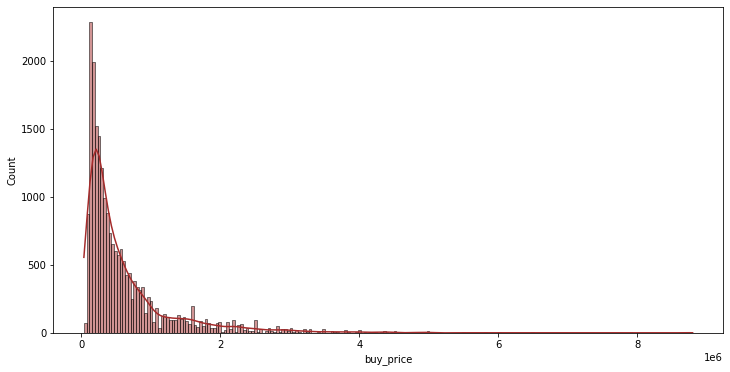

In [26]:
# ESTUDIAMOS LOS GRÁFICOS DE LA VARIABLE TARGET. VEMOS QUE TIENE UNA DESVIACIÓN BASTANTE ASIMÉTRICA. ESTUDIAREMOS STANDARIZARLA DE CARA A LOS MODELOS QUE UTILICEMOS

plt.figure(figsize=(12,6))
sns.histplot(df['buy_price'],kde=True, linewidth=0.5, color='brown')

<AxesSubplot:xlabel='sq_mt_built', ylabel='Count'>

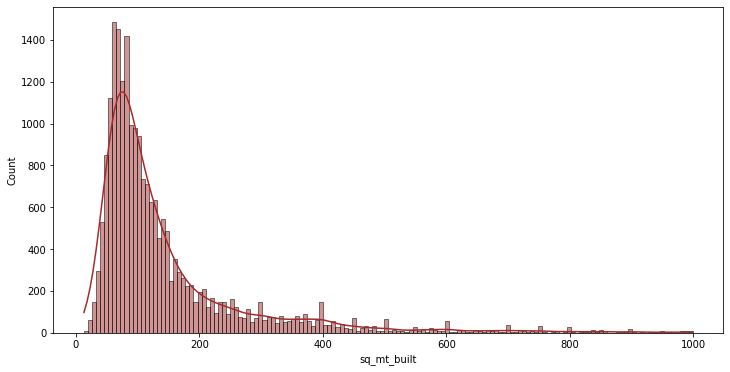

In [27]:
# EN EL CASO DE LA VARIABLE DE METROS CUADRADOS POR VIVIENDA, VEMOS IGUALMENTE SU DESVIACIÓN HACIA LA IZDA.

plt.figure(figsize=(12,6))
sns.histplot(df['sq_mt_built'],kde=True, linewidth=0.5, color='brown')

c:\Users\pieci\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


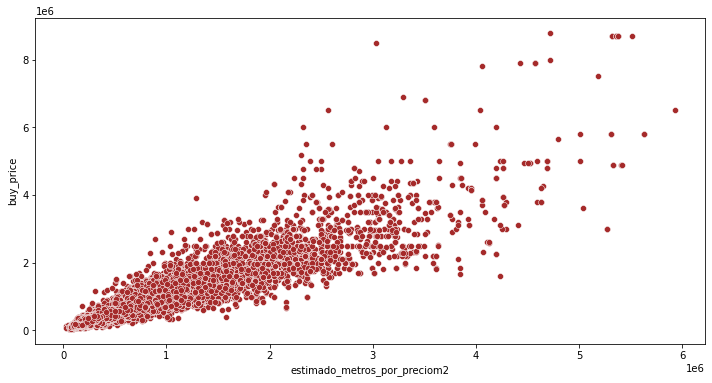

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['estimado_metros_por_preciom2'],df['buy_price'], color='brown');
# plt.yticks(np.arange(0,1200, step=50))

c:\Users\pieci\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


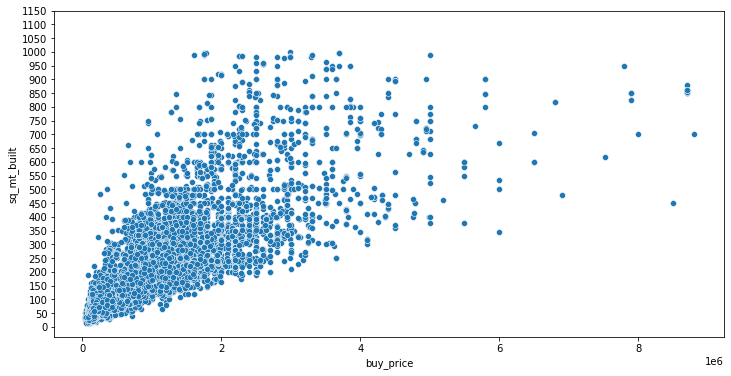

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['buy_price'],df['sq_mt_built'])
plt.yticks(np.arange(0,1200, step=50));

Len original: 21616
Len sin outliers en estimado_metros_por_preciom2: 20410
Len original: 20410
Len sin outliers en buy_price: 19184


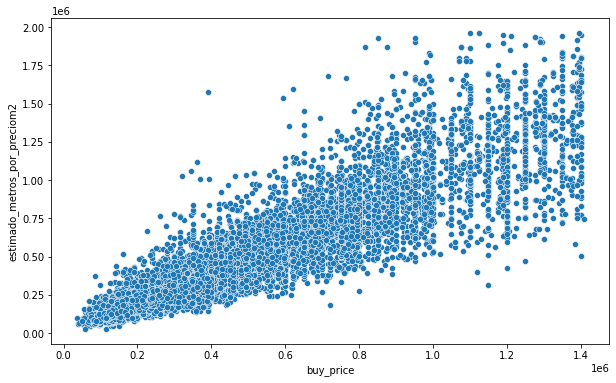

In [30]:
# ELIMINAMOS OUTLIERS DE LA VARIABLE TARGET Y DE LA VARIABLE MÁS CORRELADA.

def outlier_meanSd(df, feature, param=2):   
    media = df[feature].mean()
    desEst = df[feature].std()
    
    th1 = media - desEst*param
    th2 = media + desEst*param

    return df[((df[feature] >= th1) & (df[feature] <= th2))  | (df[feature].isnull())].reset_index(drop=True)

print("Len original:", len(df))
df = outlier_meanSd(df, 'estimado_metros_por_preciom2')
print("Len sin outliers en estimado_metros_por_preciom2:", len(df))

print("Len original:", len(df))
df = outlier_meanSd(df, 'buy_price')
print("Len sin outliers en buy_price:", len(df))

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y='estimado_metros_por_preciom2', x='buy_price');

In [31]:
df.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,buy_price,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,has_parking,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,Pisos,Casa o chalet,Áticos,Dúplex,distrito_id_num,neighborhood_id_num,neighborhood_price_m2,estimado_metros_por_preciom2
0,64.0,2,1.0,3.0,0,85000,0,0,1960.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.0,0,1,0,0,1,0,0,0,21.0,135.0,1308.89,83768.96
1,70.0,3,1.0,4.0,0,129900,1,0,1970.0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,21.0,132.0,1796.68,125767.60
2,94.0,2,2.0,1.0,0,144247,0,0,1970.0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0.0,0,0,0,0,1,0,0,0,21.0,134.0,1617.18,152014.92
3,64.0,2,1.0,0.5,1,109900,0,0,1955.0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0.0,0,0,1,0,1,0,0,0,21.0,134.0,1617.18,103499.52
4,108.0,2,2.0,4.0,0,260000,0,0,2003.0,0,0,1,1,1,1,0,1,0,0,1,0,1,1,0.0,1,1,1,1,1,0,0,0,21.0,133.0,1827.79,197401.32


In [32]:
# sns.pairplot(df.iloc[:, :12])

# .iloc[:, :12]

In [33]:
# plt.figure(figsize=(25,25))
# sns.heatmap(df.corr(), annot=True)

In [34]:
corr_matrix=df.corr()
corr_matrix['buy_price'].sort_values(ascending=False)

buy_price                       1.000000
estimado_metros_por_preciom2    0.918277
sq_mt_built                     0.786632
n_bathrooms                     0.742240
neighborhood_price_m2           0.597936
n_rooms                         0.530795
has_parking                     0.335332
has_garden                      0.317883
Casa o chalet                   0.305173
has_lift                        0.263265
has_pool                        0.259279
has_central_heating             0.251538
has_storage_room                0.246887
has_fitted_wardrobes            0.184942
has_ac                          0.182721
has_balcony                     0.122506
is_orientation_west             0.114984
Áticos                          0.112684
is_exterior                     0.103252
has_terrace                     0.100100
has_green_zones                 0.097841
floor                           0.096263
is_orientation_south            0.094217
is_orientation_east             0.087256
parking_price   

<AxesSubplot:>

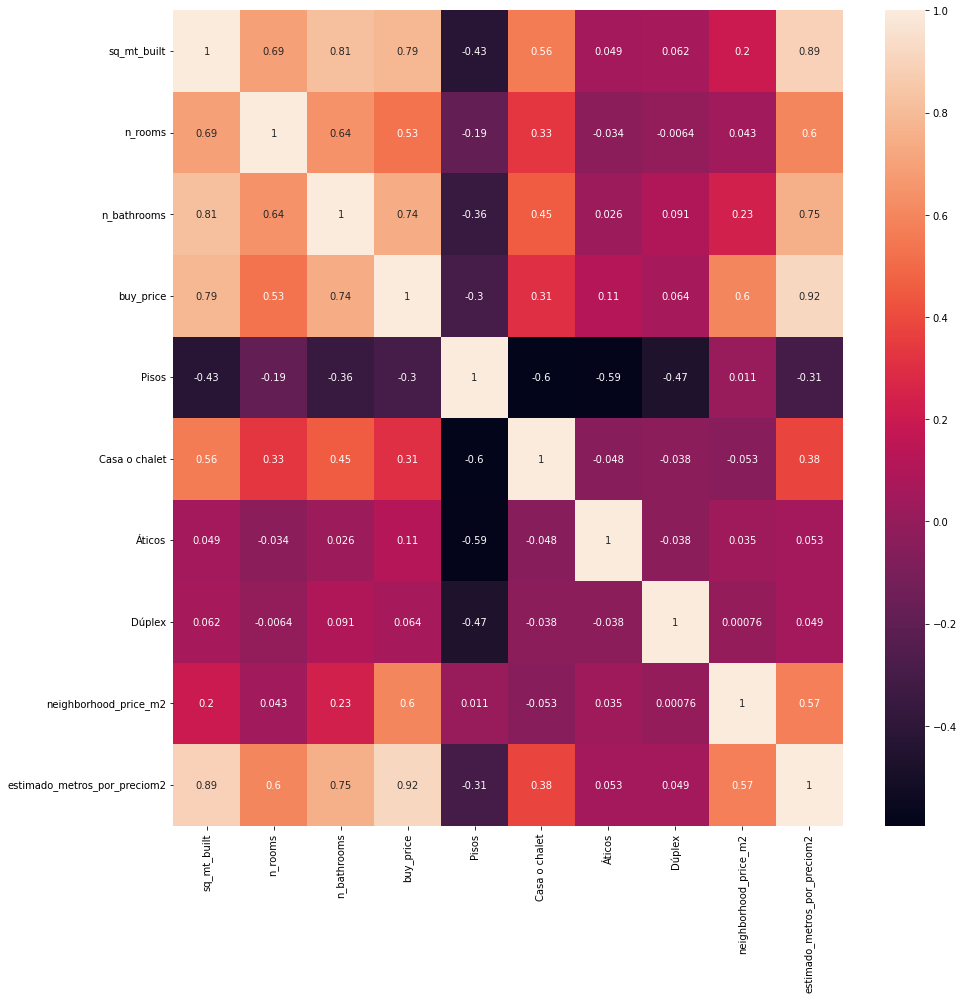

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(df.drop(columns=[
                            'has_parking',
                            'has_garden',
                            'has_lift',
                            'has_storage_room',
                            'has_central_heating',
                            'has_pool',
                            'has_fitted_wardrobes',
                            'has_ac',
                            'floor',
                            'has_balcony',
                            'is_orientation_west',
                            'has_terrace',
                            'is_exterior',
                            'is_orientation_south',
                            'has_green_zones',
                            'is_orientation_east',
                            'parking_price',
                            'is_new_development',
                            'is_orientation_north',
                            'is_accessible',
                            'is_renewal_needed',
                            'built_year',
                            'is_floor_under',
                            'has_individual_heating',
                            'neighborhood_id_num',
                            'distrito_id_num'
]).corr(), annot=True)

In [36]:
# GUARDAMOS EL DF COMPLETO Y UNO CON LAS VARIABLES MÁS IMPORTANTES PARA EMPEZAR A MODELAR.
                            
df_model_completo = df

# df_model_max_rel = df.drop(columns=[
#                             'has_parking',
#                             'has_garden',
#                             'has_lift',
#                             'has_storage_room',
#                             'has_central_heating',
#                             'has_pool',
#                             'house_type_id',
#                             'has_fitted_wardrobes',
#                             'has_ac',
#                             'floor',
#                             'has_balcony',
#                             'is_orientation_west',
#                             'has_terrace',
#                             'is_exterior',
#                             'is_orientation_south',
#                             'has_green_zones',
#                             'is_orientation_east',
#                             'parking_price',
#                             'is_new_development',
#                             'is_orientation_north',
#                             'is_accessible',
#                             'is_renewal_needed',
#                             'built_year',
#                             'is_floor_under',
#                             'has_individual_heating',
#                             'neighborhood_id_num',
#                             'distrito_id_num'])


In [37]:
print(df_model_completo.shape)
# print(df_model_max_rel.shape)


(19184, 36)


In [38]:
df_model_completo.to_csv('../data/df_model_completo.csv')

# df_model_max_rel.to_csv('../data/df_model_max_rel_con_dup.csv')